**Physics 3700 Lab 6**
 
***1.Arbitrary Frequency Response.*** *The approach used to derive the windowed-sinc filter this week in class can also be used to design filters with virtually any frequency response. The only difference is how the desired response is moved from the frequency domain into the time domain. In the windowed-sinc filter, the frequency response and the filter kernel are both represented by equations, and the conversion between them is made by evaluating the mathematics of the Fourier transform. In the method presented here, both signals are represented by arrays of numbers, with a computer program (the FFT) being used to find one from the other. See Chapter 17 of our online text for more information.*

*(a) Read the data file arb_freq_resp.csv. It contains an arbitrary frequency response and your task here is to design a filter that has the response shown if you plot the data in the file. You can assume the horizontal axis goes from 0 to π (or half the sampling frequency).*

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cmath
import time

In [7]:
def myconv(x,h):
    '''This function takes a 2 lists of numbers and convolves them.'''
    i = 0
    lst = []
    while (i < (len(x)+len(h))-1):
        j=0
        value = 0
        while (j < len(h)):
            if ((i-j)>=0) and ((i-j)<len(x)):
                value = value + h[j]*x[i-j]
            j+=1
        lst.append(value)
        i+=1
    return lst

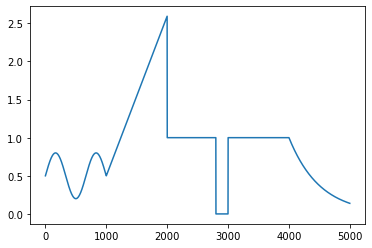

In [37]:
arb_freq_resp = np.loadtxt("./files/Lab6/arb_freq_resp.csv")
plt.plot(arb_freq_resp)

*(b) Apply an IDFT to the data. This will transform the frequency data to the time domain, but it will be aliased. (the samples that are all the way on the right of your IDFT should be at the beginning)*


/Users/Dallas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


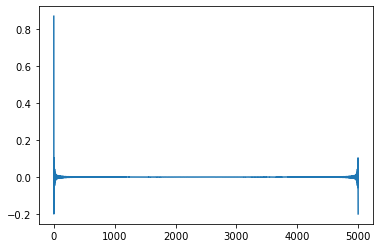

In [69]:
IDFT_afr = np.fft.ifft(arb_freq_resp)
plt.plot(IDFT_afr)

*(c) Shift and truncate the IDFT to make a filter kernel of length M = 30. The first half of the samples in your filter kernel should be the last M/2 points in your IDFT and the second half of your samples in your filter kernel should be the first M/2 points in your IDFT.*

In [59]:
hn_30 = np.concatenate((IDFT_afr[-15:], IDFT_afr[:15]), axis=0)

*(d) Apply a DFT to your filter kernel to check that you get the original frequency response.*

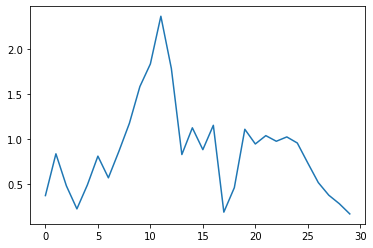

In [61]:
DFT_hn_30 = np.fft.fft(hn_30)
plt.plot(np.abs(DFT_hn_30))

*(e) Apply a Hamming window to your filter kernel. Apply a DFT to your filter kernel to check that you get the original frequency response.*

In [344]:
ndow = 30
nsamp = 30
i=int(-(ndow-1)/2)
wn_hamming = [0.]*nsamp
while i <= ((ndow-1)/2):
    wn_hamming[i+ndow//2] = 0.54+0.46*np.cos(2*np.pi*i/(ndow-1))
    i+=1
windowed_filter_30 = []
for n1, n2 in zip(hn_30, wn_hamming):
    windowed_filter_30.append(n1*n2)

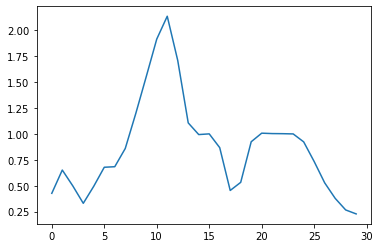

In [338]:
DFT_wf_30 = np.fft.fft(windowed_filter_30)
plt.plot(np.abs(DFT_wf_30))

*(f) Repeat the above steps with M = 100 and M = 300 and plot the resulting frequency responses.*

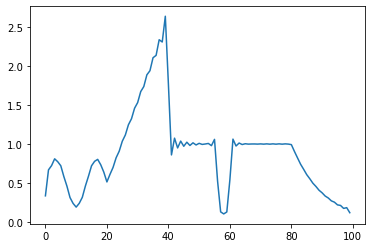

In [65]:
hn_100 = np.concatenate((IDFT_afr[-50:], IDFT_afr[:50]), axis=0)
DFT_hn_100 = np.fft.fft(hn_100)
plt.plot(np.abs(DFT_hn_100))

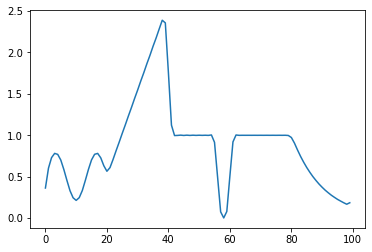

In [342]:
ndow = 100
nsamp = 100
i=int(-(ndow-1)/2)
wn_hamming = [0.]*nsamp
while i <= ((ndow-1)/2):
    wn_hamming[i+ndow//2] = 0.54+0.46*np.cos(2*np.pi*i/(ndow-1))
    i+=1
windowed_filter_100 = []
for n1, n2 in zip(hn_100, wn_hamming):
    windowed_filter_100.append(n1*n2)
DFT_wf_100 = np.fft.fft(windowed_filter_100)
plt.plot(np.abs(DFT_wf_100))

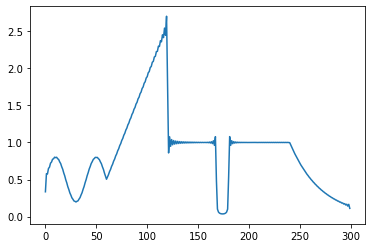

In [82]:
hn_300 = np.concatenate((IDFT_afr[-150:], IDFT_afr[:150]), axis=0)
DFT_hn_300 = np.fft.fft(hn_300)
plt.plot(np.abs(DFT_hn_300))

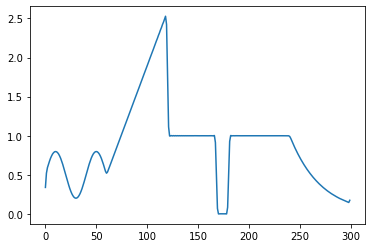

In [340]:
ndow = 300
nsamp = 300
i=int(-(ndow-1)/2)
wn_hamming = [0.]*nsamp
while i <= ((ndow-1)/2):
    wn_hamming[i+ndow//2] = 0.54+0.46*np.cos(2*np.pi*i/(ndow-1))
    i+=1
windowed_filter_300 = []
for n1, n2 in zip(hn_300, wn_hamming):
    windowed_filter_300.append(n1*n2)
DFT_wf_300 = np.fft.fft(windowed_filter_300)
plt.plot(np.abs(DFT_wf_300))

*(g) Describe the effects of windowing and varying M on the resulting frequency response.*

In [438]:
# Applying a window smoothed out the frequency response and increasing the M gave a more accurate representation
#   of the original frequency response. 

***2.Gamma Ray Detector.*** *Unwanted convolution is an inherent problem in transferring analog information. For instance, all of the following can be modelled as a convolution: image blurring in a shaky camera, echoes in long distance telephone calls, the finite bandwidth of analog sensors and electronics, etc. Deconvolution is the process of filtering a signal to compensate for an undesired convolution. The goal of deconvolution is to recreate the signal as it existed before the convolution took place. This usually requires the characteristics of the convolution (i.e., the impulse or frequency response) to be known.*

*The example we will use to illustrate deconvolution is a gamma ray detector. The information we would like to extract from this output signal is the amplitude of each pulse, which is proportional to the energy of the gamma ray that generated it. Everything would be fine if only an occasional gamma ray were detected, but this is usually not the case. Two or more pulses may overlap, shifting the measured amplitude. One answer to this problem is to deconvolve the detector’s output signal, making the pulses narrower so that less pile-up occurs. Ideally, we would like each pulse to resemble the original impulse. As you may suspect, this isn’t possible and we must settle for a pulse that is finite in length, but significantly shorter than the detected pulse. See Chapter 17 of our online text for more information.*

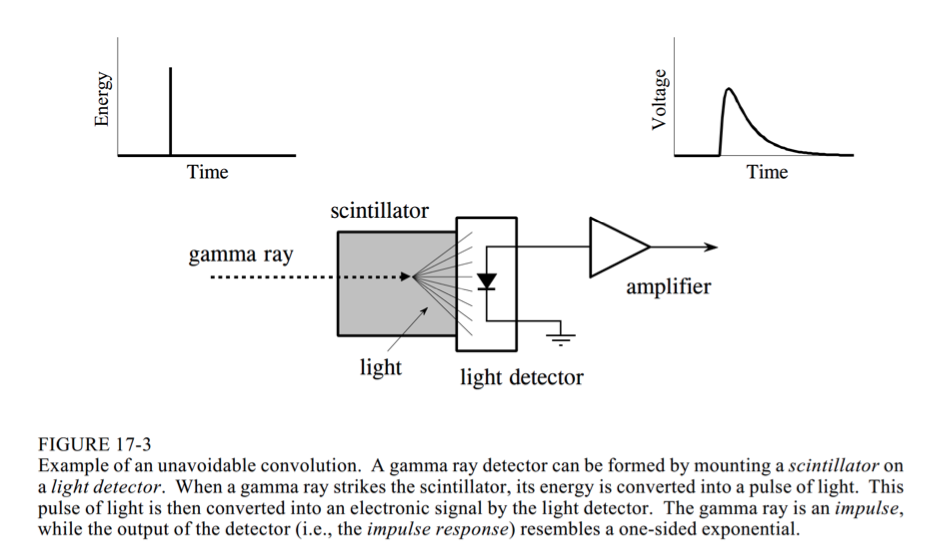

*(a) Read in the data from gamma_data.csv. This file contains a fake series of time data from a gamma ray detector.*

In [16]:
gamma_data = np.loadtxt("./files/Lab6/gamma_data.csv")

*(b) Read in the data from detected.csv. This is a single detected pulse.*

In [17]:
detected = np.loadtxt("./files/Lab6/detected.csv")

*(c) Read in the data from desired.csv. This is the desired pulse (what we hoped the signal from one gamma ray looks like).*

*You want to find the filter kernel that when applied to the detected pulse, turns it into the desired pulse. So KERNEL convolved with DETECTED equals DESIRED. The problem is that we cannot deconvolve in the time domain, but just as convolution in the time domain is equivalent to multiplying in the frequency domain, deconvolution in the time domain is equivalent to division in the frequency domain.*

In [75]:
desired = np.loadtxt("./files/Lab6/desired.csv")

*(d) Use the DFT of DETECTED and DESIRED to find the DFT of KERNEL. Then perform an IDFT to find the actual filter kernel.*

In [291]:
# DFTing the data will convert the funciton to the frequency domain, where you can multiply or divide the data
#   to convolve deconvolve it respectively. The result can have a IDFT applied to it to put it back into the 
#   time domain. In this case frequency doman of kernel, desired and detetect are realated by:
#   DFT_kernel x DFT_detected = DFT_desired, so its rearranged to find for DFT_kernel = DFT_desired/DFT_detected.

DFT_desired = np.fft.fft(desired)       # desired frequency domain
DFT_detected = np.fft.fft(detected)     # detected frequency domain
DFT_kernel = []
for n1, n2 in zip(DFT_desired, DFT_detected):
    DFT_kernel.append(n1/n2)            # kernel frequency doman
kernel = np.fft.ifft(IDFT_kernel)       # kernel time domain


*(e) Apply this kernel to the fake data and identify all sample numbers where a gamma ray is detected. Output a list that contains the sample numbers of the locations of all the gamma ray pulses.*

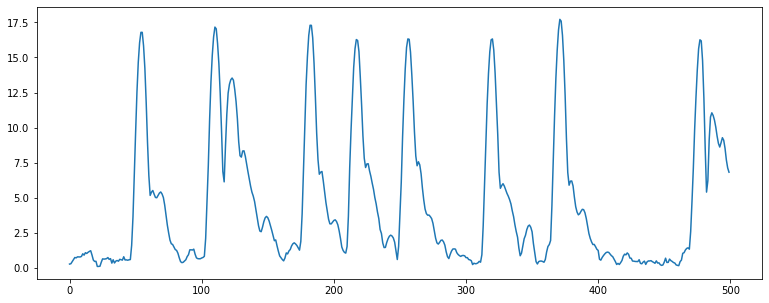

In [292]:
# Convolving the kernel with the gamma data and plotting to visually see the outcome.

gamma_pulses = np.convolve(kernel, gamma_data)

plt.figure(figsize=(13,5))
plt.plot(np.abs(gamma_pulses[:500]))

In [295]:
# find_peaks literally finds the peaks and returns the index location, sample #, of that peak. It also 
#   returns other information so the full result is in an array. Index location is found in the first element in
#   the array. The prominence parameter is its sensitivity to peaks, the higher the number less peaks are found.
#   I decided to scale it back a bit to include some of the secondary peaks that are usually close to higher peaks.
#   I hope I'm not "cheating" by using the find_peask function but it seemed to get me a good result the fastest.

from scipy.signal import find_peaks
gamma_loc_ = find_peaks(np.abs(gamma_pulses), prominence=2)
gamma_loc = gamma_loc_[0]
print(gamma_loc)

[  54  110  123  182  217  256  320  348  371  477  486  539  573  614
  679  708  730  806  839  871  932 1036 1059 1138 1172 1188 1219 1239
 1248 1364 1493 1505 1521 1593 1616 1659 1669 1708 1871 1879 1896 1929
 2031 2042 2133 2149 2179 2259 2313 2450 2483 2526 2609 2654 2706 2818
 2893 2908 3075 3134 3245 3294 3392 3407 3436 3478 3487 3573 3843 3881
 3920 3940 4083 4248 4326 4353 4439 4447 4543 4624 4767 4804 4840]


In [296]:
np.argmax(np.abs(gamma_pulses[:100]))  # verifying that the finx_pdaks function was accurate

54

***3.Overlap Method and FFT Convolution.*** *The overlap-add method is used to break long signals into smaller segments for easier processing. FFT convolution uses the overlap-add method together with the Fast Fourier Transform, allowing signals to be convolved by multiplying their frequency spectra.*

*Last week you applied a recursive filter to your brown fox wav file. If instead we wanted to apply a filter through convolution you could imagine the task taking quite a while. What you will do here is split that wav file into segments (over-lap method), then multiply the FFT of the segment with the FFT of the the filter kernel to avoid doing the convolution in the time domain. That’s the second step in making the process more efficient. The first step was splitting the signal up into segments. The filtered segments are then added back together to produce the final complete filtered signal. See Chapter 18 of our online text for more information.*

*(a) Your filter will be a 41 point sinc filter. Pad the filter kernel with zeros to produce a kernel with a total of 256 points. Find the DFT of the filter.*

In [8]:
# creating a normalized 41 point sinc function
sinc_1 = [np.sinc(n)/41 for n in np.arange(-(41-1)/8,(41-1)/8,.25)]

# DFT of a padded sinc function (padded with zeros to fill to a 256 length)
sinc_pad = sinc_1+[0]*216
DFT_sinc_pad =  np.fft.fft(sinc_pad)


*(b) Break your brown fox wave file into segments that are 128 samples long. Pad each segment with another 128 zeros. This is to allow the next segment to be added (overlapped). Find the DFT of the padded segments.*

In [9]:
from scipy.io import wavfile
fs_quick, quick_array = wavfile.read('./files/TheQuick.wav')
quick = quick_array.tolist()

<ipython-input-9-acdc9977b9a4>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_quick, quick_array = wavfile.read('./files/TheQuick.wav')


In [10]:
# cutting up the quick sound file into 128 sample segments, padding them with 128 zeros, then applying a DFT
i=0
DFT_quick_pad = [0]*1251
while i < int(len(quick)/128):
    DFT_quick_pad[i] = []
    DFT_quick_pad[i] = np.fft.fft(quick[i*128:(i+1)*128]+[0]*128)
    i+=1


*(c) The DFT of the filter and the DFT of a segment will be multiplied together (convolution in time domain) to produce an output of the segment. Then apply an IDFT to the output to move it back to the time domain.*

In [11]:
# multiplying the padded_sinc and padded quick sound file that are both in the fequency domain is the same as
#   convolving them in the time domain. this is done for each padded segment each output had a IDFT applied to it
#   to convert back to the time domain. 

out = [0]*1251
output = [0]*1251
i=0
while i < len(DFT_quick_pad):
    out[i] = []
    output[i] = []
    for n1, n2 in zip(DFT_sinc_pad, DFT_quick_pad[i]):
        out[i].append(n1*n2)
    output[i] = np.fft.ifft(out[i])
    i+=1

*(d) The final total output stream will be all of the segments recombined. This step requires some planning. After the first segment, the first half of the segment will overlap with the previous segment, and the second half of the segment overlaps with the next segment.*

In [12]:
# now that the quick filtered signal segments are put back into the time domain, they need to be stacked and
#   recombined. The last half of each segment will have first half of the next segment combined.

signal_recombined = []
for n in output[0][0:128]: # starting the recombining process with first half of first element of output
    signal_recombined.append(n)
j=0
while j < (len(output)-1): # appending the addition of last half an element & first half of the next element
    i=0
    while i < 128:
        signal_recombined.append(output[j][i+128]+output[j+1][i])
        i+=1
    j+=1

*(e) Plot the final filtered output and compare it with the output from a direct convolution.*

/Users/Dallas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


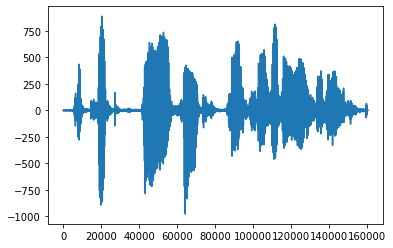

In [13]:
# plotting both the overlap/FFT (signal_combined) and the direct convolution (signal_direct) show that
#  they have similar results.

plt.plot(signal_recombined)

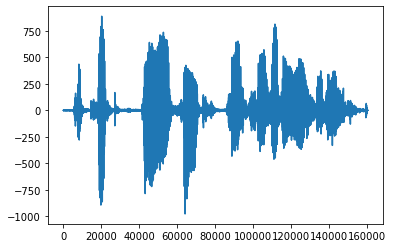

In [15]:
signal_direct = myconv(quick,sinc_1)  # using my convolve function, convolving quick sound file with 41pt sinc function
plt.plot(signal_direct)


(f) Time the two processes, direct convolution and overlap FFT convolution. For reference 300,000 samples convolved took 13 seconds and 300,000 samples overlap/FFT took 1.2 seconds.

In [16]:
time_start1 = time.process_time()
signal_direct = myconv(quick,sinc_1)              # sinc_1 is a 41 point sinc function
time_elapsed1 = (time.process_time() - time_start1)
print("Run time for direct convolution: %5.5f s" % time_elapsed1)


time_start2 = time.process_time()
sinc_pad = sinc_1+[0]*216                # padding the sinc func with zeros to reach 256 length
DFT_sinc_pad =  np.fft.fft(sinc_pad)     # dft of the padded sinc func
i=0
DFT_quick_pad = [0]*1251
while i < int(len(quick)/128):           # making dfts of segments of 128 samples the signal padded with 0 to 256
    DFT_quick_pad[i] = []
    DFT_quick_pad[i] = np.fft.fft(quick[i*128:(i+1)*128]+[0]*128)
    i+=1
out = [0]*1251
output = [0]*1251
i=0
while i < len(DFT_quick_pad): # mutiplying the elements of the dfts of the padded sinc func and padded signal segments
    out[i] = []
    output[i] = []
    for n1, n2 in zip(DFT_sinc_pad, DFT_quick_pad[i]):
        out[i].append(n1*n2)
    output[i] = np.fft.ifft(out[i])  # inverse dft of the results
    i+=1
time_elapsed3 = (time.process_time() - time_start2)
signal_recombined = []
for n in output[0][0:128]:           # starting the recombining process with first half of first element of output
    signal_recombined.append(n)
j=0
while j < (len(output)-1):           # appending the addition of last half an element & first half of the next element
    i=0
    while i < 128:
        signal_recombined.append(output[j][i+128]+output[j+1][i])
        i+=1
    j+=1
time_elapsed2 = (time.process_time() - time_start2)
print("Run time for overlap/FFT: %5.5f s" % time_elapsed2)


Run time for direct convolution: 6.48007 s
Run time for overlap/FFT: 0.41682 s


In [441]:
# The time results were as expected. The overlap/FFT is significantly faster than my convolve function. 